**Importing necessary libraries**

In [21]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

**Load Fake and Real news Datasets**

In [3]:
fake_data = pd.read_csv('Fake.csv')
real_data = pd.read_csv('True.csv')

**Add 'Class' column and assign class 0 to fake news and class 1 to real news**

In [5]:
fake_data['Class']=0
real_data['Class']=1

**Print the shape of the fake and real news datasets**

In [6]:
print(fake_data.shape,real_data.shape)

(23481, 5) (21417, 5)


**Concatenate the two dataframes by rows**

In [7]:
all_data =pd.concat([fake_data,real_data],axis=0)
all_data.shape

(44898, 5)

**Visualization of Class Distribution using pie chart**

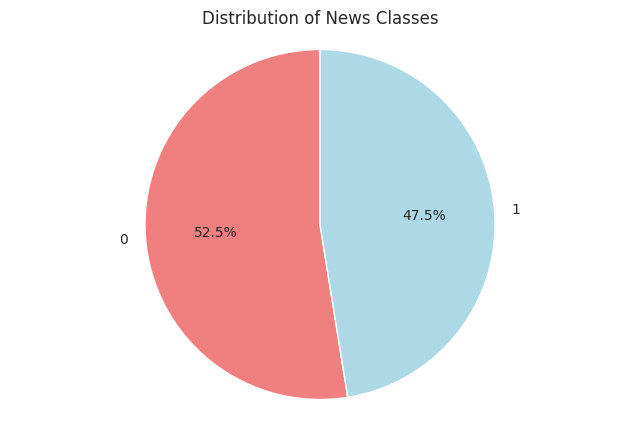

In [70]:
class_counts = all_data['Class'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribution of News Classes')
plt.axis('equal')
plt.show()

**Visualization of Text Distribution**

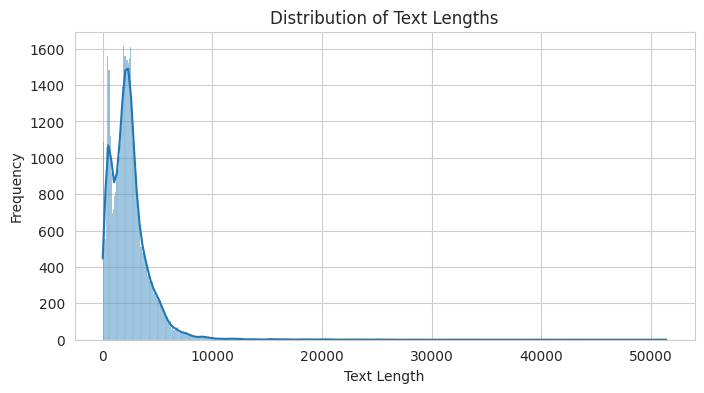

In [72]:
# Calculate text lengths
all_data['text_length'] = all_data['text'].apply(len)

# Plotting the histogram
plt.figure(figsize=(8, 4))
sns.histplot(all_data['text_length'], kde=True) # kde=True adds a kernel density estimate
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

**Columns of the concatenated dataframe**

In [8]:
all_data.columns

Index(['title', 'text', 'subject', 'date', 'Class'], dtype='object')

**Descriptive statistics for all columns**

In [9]:
all_data.describe(include='all')

,title,text,subject,date,Class
count,44898,44898,44898,44898,44898.000000
unique,38729,38646,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11272,182,NaN
mean,NaN,NaN,NaN,NaN,0.477015
std,NaN,NaN,NaN,NaN,0.499477
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1.000000


**Checking null values**

In [10]:
all_data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
Class,0


**Shuffle the data**

In [11]:
all_data = all_data.sample(frac=1).reset_index(drop=True)

**Drop duplicated rows**

In [12]:
all_data.drop_duplicates(inplace=True)
all_data.head()

,title,text,subject,date,Class
0,WATCH: President Obama HAMMERS Trump For Clai...,Donald Trump thinks African-Americans are wors...,News,"September 23, 2016",0
1,House intel panel chief says did not meet Trum...,WASHINGTON (Reuters) - U.S. House Intelligence...,politicsNews,"March 27, 2017",1
2,Obama to name Scalia replacement in just over ...,WASHINGTON (Reuters) - U.S. Senate Democratic ...,politicsNews,"February 19, 2016",1
3,Nigeria puts fortress towns at heart of new Bo...,"BAMA, Nigeria (Reuters) - Nigeria s government...",worldnews,"December 1, 2017",1
4,PATRIOT ARTIST’S LATEST TRIBUTE TO TRUMP SUPPO...,Patriot artist John McNaughton just revealed h...,politics,"Aug 21, 2017",0


**Function to clean and preprocess text data**

In [13]:
def wordopt(text):
    text = text.lower()     # convert text to lower-case
    text = re.sub('\[.*?\]', '', text)  # removes square brackets
    text = re.sub("\\W"," ",text)   # remove special characters
    text = re.sub('https?://\S+|www\.\S+', '', text)    # remove links/URLs
    text = re.sub('<.*?>+', '', text)   # remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)     # remove punctuations
    text = re.sub('\n', '', text)   # remove new line characters
    text = re.sub('\w*\d\w*', '', text)    # remove words containing numbers/digits
    return text     # return the cleaned text

**Apply the wordopt function to clean the 'text' column in all_data**

In [14]:
all_data['text'] = all_data['text'].apply(wordopt)

**Assign the 'text' column to x and 'Class' column to y**

In [15]:
x = all_data['text']
y = all_data['Class']

**Split data into training and testing sets**

In [17]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=365)


In [18]:
print(train_x.shape, test_x.shape)

(31282,) (13407,)


**Initialize TF-IDF vectorizer**

In [22]:
vectorization = TfidfVectorizer()

**Vectorize training and test data using TF-IDF**

In [23]:
xv_train = vectorization.fit_transform(train_x)
xv_test = vectorization.transform(test_x)

**Initialize a LOGISTIC REGRESSION model**

In [24]:
lr = LogisticRegression()

**Fit training data into the LR model**

In [25]:
lr.fit(xv_train,train_y)

LogisticRegression()

In [27]:
print(f"Accuracy score for Logistic Regression training dataset: {lr.score(xv_train, train_y)}")

Accuracy score for Logistic Regression training dataset: 0.9907294929991689


**Predict on test data**

In [30]:
pred_lr=lr.predict(xv_test)
print(f"Accuracy score for Logistic Regression testing dataset: {accuracy_score(test_y, pred_lr)}")

Accuracy score for Logistic Regression testing dataset: 0.985604534944432


**Initialize DECISION TREE CLASSIFIER model**

In [31]:
DTC = DecisionTreeClassifier()

**Fit training data into the DTC model**

In [32]:
DTC.fit(xv_train,train_y)

DecisionTreeClassifier()

In [35]:
print(f"Accuracy score for Decision Tree Classifier training dataset: {DTC.score(xv_train, train_y)}")

Accuracy score for Decision Tree Classifier training dataset: 1.0


**Predict on Test Data**

In [36]:
predict_dtc = DTC.predict(xv_test)
print(f"Accuracy score for Decision Tree Classifier testing dataset: {accuracy_score(test_y, predict_dtc)}")

Accuracy score for Decision Tree Classifier testing dataset: 0.995375550085776


**Initialize RANDOM FOREST CLASSIFIER model**

In [39]:
RFC = RandomForestClassifier()

**Fit training data into RFC model**

In [40]:
RFC.fit(xv_train,train_y)

RandomForestClassifier()

In [42]:
print(f"Accuracy score for training dataset: {RFC.score(xv_train, train_y)}")

Accuracy score for training dataset: 1.0


**Predict for Test Data**

In [43]:
predict_rfc = RFC.predict(xv_test)
print(f"Accuracy score for testing dataset: {accuracy_score(test_y, predict_rfc)}")

Accuracy score for testing dataset: 0.9873946445886477


**Initialize GRADIENT BOOSTING CLASSIFIER model**

In [44]:
GBC = GradientBoostingClassifier()

**Fit training data into GBC model**

In [45]:
GBC.fit(xv_train,train_y)

GradientBoostingClassifier()

**Predict on Test Data**

In [46]:
predict_gbc = GBC.predict(xv_test)
print(f"Accuracy score for testing dataset: {accuracy_score(test_y, predict_gbc)}")

Accuracy score for testing dataset: 0.9955247258894607


**Accuracies: LR, DTC, RFC, GBC**

In [48]:
print(f"Accuracy by Logistic Regression: {accuracy_score(test_y, pred_lr)*100:.2f}%")
print("------------------------------------------------")
print(f"Accuracy by Decision Tree Classifier: {accuracy_score(test_y, predict_dtc)*100:.2f}%")
print("------------------------------------------------")
print(f"Accuracy by Random Forest Classifier: {accuracy_score(test_y, predict_rfc)*100:.2f}%")
print("------------------------------------------------")
print(f"Accuracy by Gradient Boosting Classifier: {accuracy_score(test_y, predict_gbc)*100:.2f}%")

Accuracy by Logistic Regression: 98.56%
------------------------------------------------
Accuracy by Decision Tree Classifier: 99.54%
------------------------------------------------
Accuracy by Random Forest Classifier: 98.74%
------------------------------------------------
Accuracy by Gradient Boosting Classifier: 99.55%


**Confusion matrix of models**

In [49]:
cm_lr = confusion_matrix(test_y, pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Confusion matrix for Decision Tree Classifier
cm_dtc = confusion_matrix(test_y, predict_dtc)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(cm_dtc)

# Confusion matrix for Random Forest Classifier
cm_rfc = confusion_matrix(test_y, predict_rfc)
print("\nConfusion Matrix for Random Forest Classifier:")
print(cm_rfc)

# Confusion matrix for Gradient Boosting Classifier
cm_gbc = confusion_matrix(test_y, predict_gbc)
print("\nConfusion Matrix for Gradient Boosting Classifier:")
cm_gbc

Confusion Matrix for Logistic Regression:
[[7011  107]
 [  86 6203]]

Confusion Matrix for Decision Tree Classifier:
[[7095   23]
 [  39 6250]]

Confusion Matrix for Random Forest Classifier:
[[7044   74]
 [  95 6194]]

Confusion Matrix for Gradient Boosting Classifier:


array([[7075,   43],
       [  17, 6272]])

**Visualization of Confusion matrix of all models**

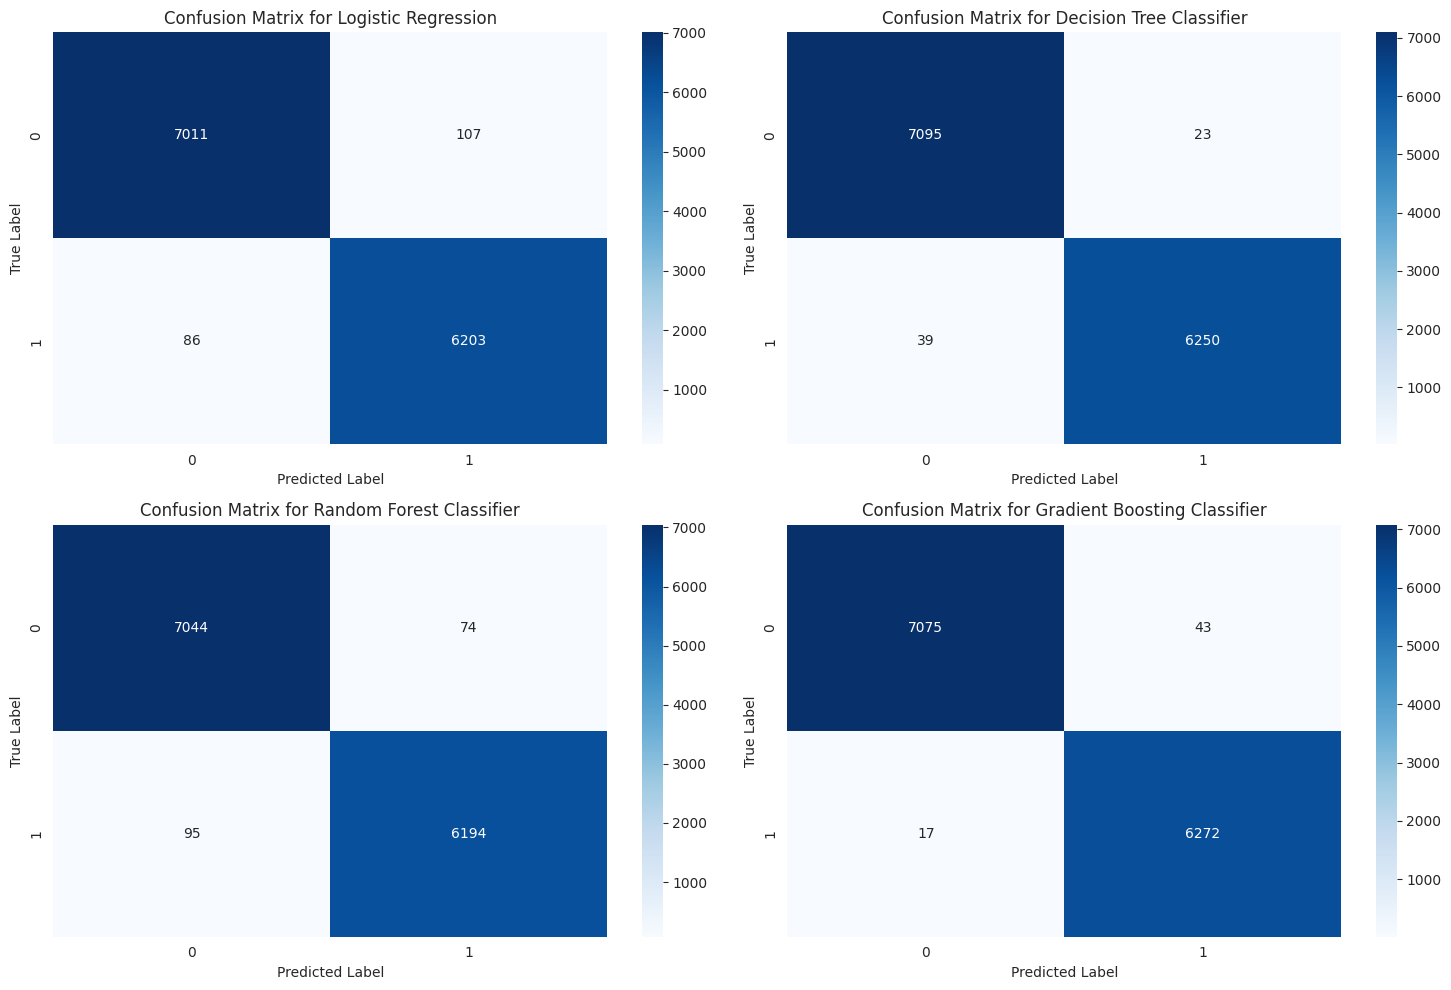

In [62]:
models = {
    'Logistic Regression': (test_y, pred_lr),
    'Decision Tree Classifier': (test_y, predict_dtc),
    'Random Forest Classifier': (test_y, predict_rfc),
    'Gradient Boosting Classifier': (test_y, predict_gbc)
}

plt.figure(figsize=(15,10))

for i, (model_name, (y_true, y_pred)) in enumerate(models.items()):
    cm = confusion_matrix(y_true, y_pred)
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

**Visualization of Classification reports**

In [63]:
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': pred_lr,
    'Decision Tree Classifier': predict_dtc,
    'Random Forest Classifier': predict_rfc,
    'Gradient Boosting Classifier': predict_gbc
}

for model_name, y_pred in models.items():
  print(f"Classification Report for {model_name}:")
  print(classification_report(test_y, y_pred))
  print("-" * 50)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7118
           1       0.98      0.99      0.98      6289

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

--------------------------------------------------
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7118
           1       1.00      0.99      1.00      6289

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407

--------------------------------------------------
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99     

**Visualization of ROC curve for all models**

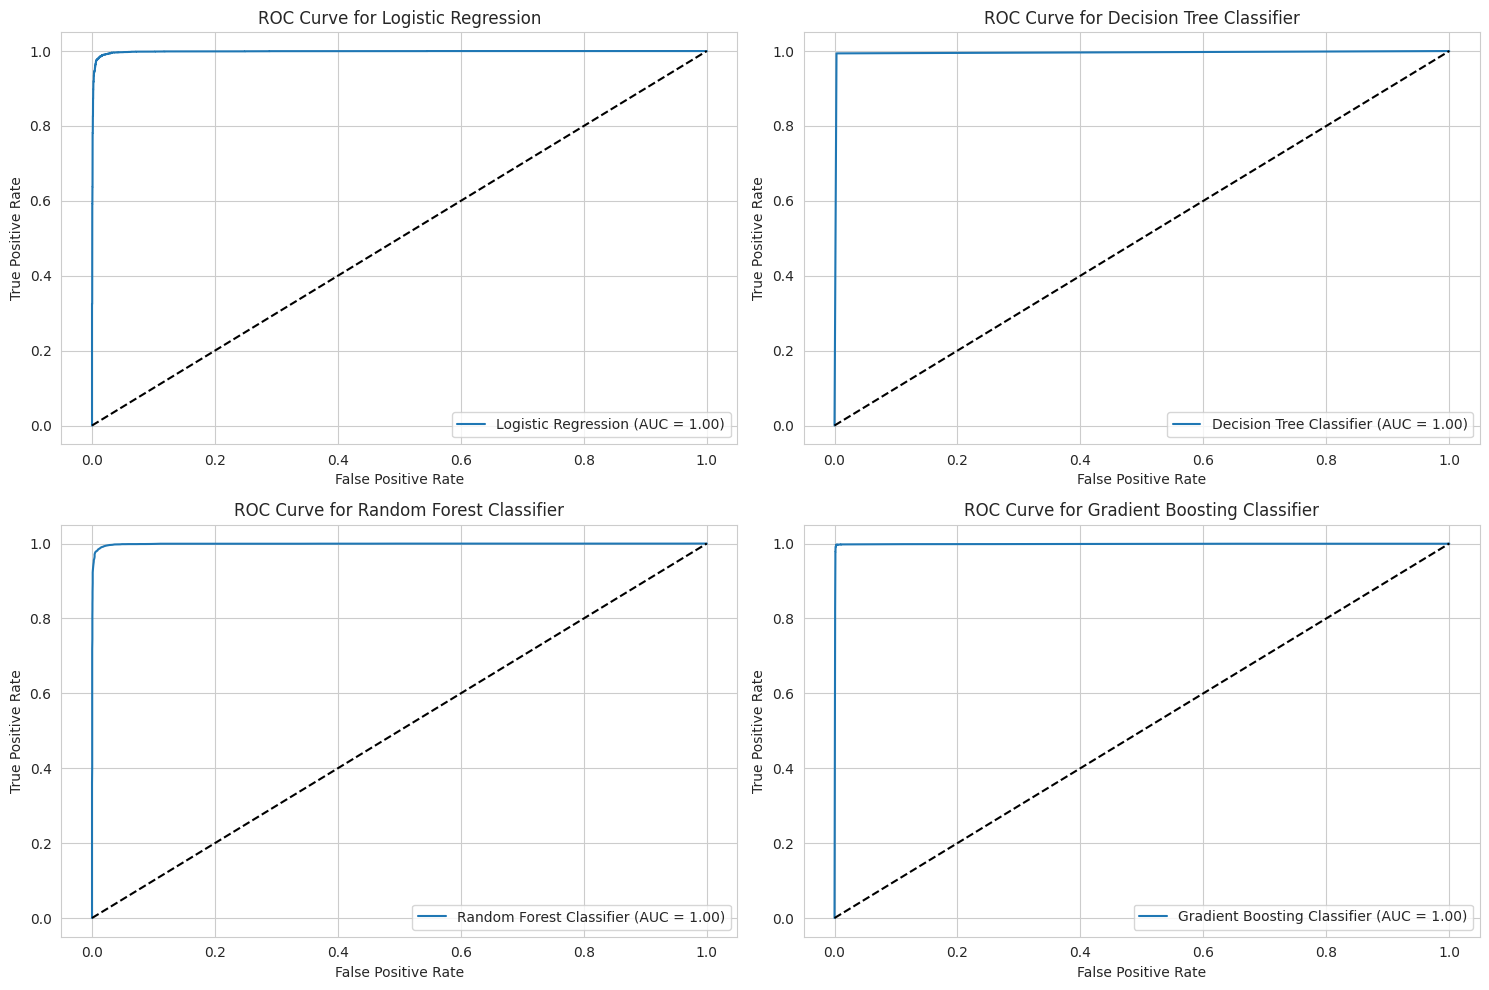

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
models = {
    'Logistic Regression': (test_y, lr.predict_proba(xv_test)[:, 1]),  # Use predict_proba for probabilities
    'Decision Tree Classifier': (test_y, DTC.predict_proba(xv_test)[:, 1]),
    'Random Forest Classifier': (test_y, RFC.predict_proba(xv_test)[:, 1]),
    'Gradient Boosting Classifier': (test_y, GBC.predict_proba(xv_test)[:, 1])
}

plt.figure(figsize=(15, 10))

for i, (model_name, (y_true, y_pred_prob)) in enumerate(models.items()):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    plt.subplot(2, 2, i + 1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

**Visualization of all models**

In [77]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_score(test_y, pred_lr), accuracy_score(test_y, predict_dtc), accuracy_score(test_y, predict_rfc), accuracy_score(test_y, predict_gbc)],
    'Recall': [classification_report(test_y, pred_lr, output_dict=True)['weighted avg']['recall'], classification_report(test_y, predict_dtc, output_dict=True)['weighted avg']['recall'], classification_report(test_y, predict_rfc, output_dict=True)['weighted avg']['recall'], classification_report(test_y, predict_gbc, output_dict=True)['weighted avg']['recall']],
    'Precision': [classification_report(test_y, pred_lr, output_dict=True)['weighted avg']['precision'], classification_report(test_y, predict_dtc, output_dict=True)['weighted avg']['precision'], classification_report(test_y, predict_rfc, output_dict=True)['weighted avg']['precision'], classification_report(test_y, predict_gbc, output_dict=True)['weighted avg']['precision']],
    'F1-score': [classification_report(test_y, pred_lr, output_dict=True)['weighted avg']['f1-score'], classification_report(test_y, predict_dtc, output_dict=True)['weighted avg']['f1-score'], classification_report(test_y, predict_rfc, output_dict=True)['weighted avg']['f1-score'], classification_report(test_y, predict_gbc, output_dict=True)['weighted avg']['f1-score']]
}

df = pd.DataFrame(data)
df

,Model,Accuracy,Recall,Precision,F1-score
0,Logistic Regression,0.985605,0.985605,0.985612,0.985606
1,Decision Tree,0.995376,0.995376,0.995378,0.995375
2,Random Forest,0.987395,0.987395,0.987397,0.987393
3,Gradient Boosting,0.995525,0.995525,0.995533,0.995525
